In [0]:
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv('AirPassengers.csv')
model = Prophet()

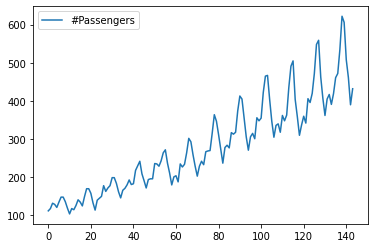

In [2]:
data.plot()

In [3]:
data['#Passengers'] = data['#Passengers'] - data['#Passengers'].shift(1)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


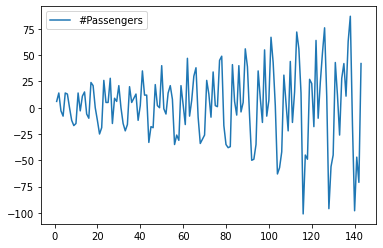

In [4]:
data.plot()

In [5]:
data.columns

Index(['Month', '#Passengers'], dtype='object')

In [6]:
data.rename(columns={'Month':'ds','#Passengers':'y'},inplace=True)
data = data[1:]
#fitting model to the data
model.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:

data.shape

(143, 2)

In [0]:
future_dates = model.make_future_dataframe(periods=365)

In [9]:
future_dates.head()

,ds
0,1949-02-01
1,1949-03-01
2,1949-04-01
3,1949-05-01
4,1949-06-01


In [0]:
prediction = model.predict(future_dates)

In [11]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-02-01,0.868244,-27.664538,15.700611,0.868244,0.868244,-7.879756,-7.879756,-7.879756,-7.879756,-7.879756,-7.879756,0.0,0.0,0.0,-7.011512
1,1949-03-01,0.882745,12.302342,55.400917,0.882745,0.882745,33.223766,33.223766,33.223766,33.223766,33.223766,33.223766,0.0,0.0,0.0,34.106511
2,1949-04-01,0.898800,-27.120882,18.328142,0.898800,0.898800,-4.738410,-4.738410,-4.738410,-4.738410,-4.738410,-4.738410,0.0,0.0,0.0,-3.839609
3,1949-05-01,0.914338,-19.504373,25.881112,0.914338,0.914338,2.505449,2.505449,2.505449,2.505449,2.505449,2.505449,0.0,0.0,0.0,3.419787
4,1949-06-01,0.930393,16.762362,60.706226,0.930393,0.930393,37.779261,37.779261,37.779261,37.779261,37.779261,37.779261,0.0,0.0,0.0,38.709653


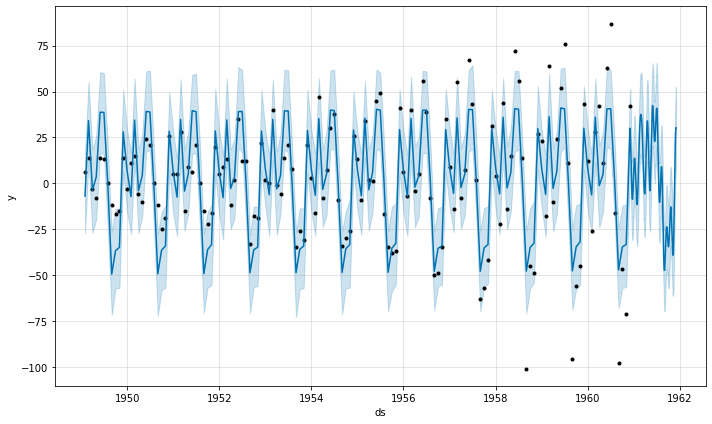

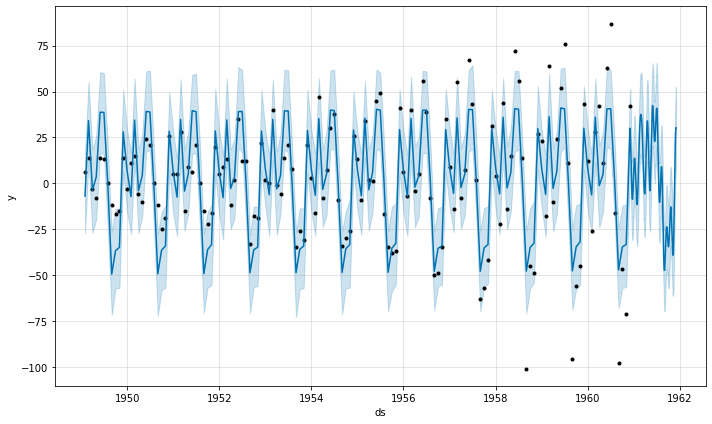

In [12]:
model.plot(prediction)

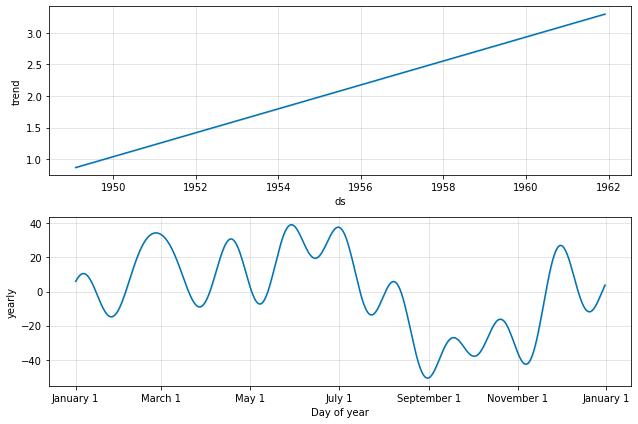

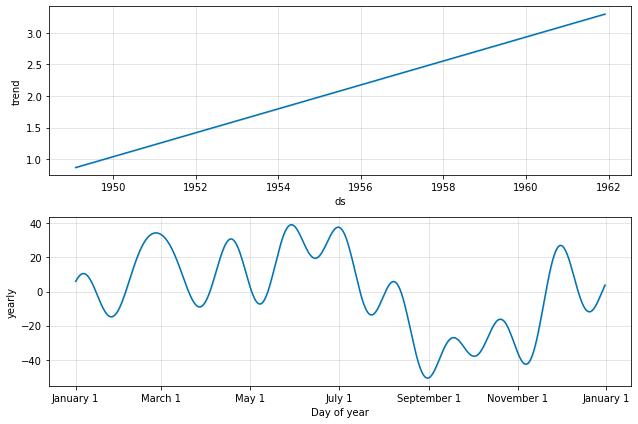

In [13]:
model.plot_components(prediction)

In [0]:
from fbprophet.diagnostics import cross_validation

In [15]:
cv = cross_validation(model,initial='35 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 22 forecasts with cutoffs between 1949-07-27 00:00:00 and 1959-12-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [0]:
from fbprophet.diagnostics import performance_metrics

In [17]:
df_pm = performance_metrics(cv)

INFO:fbprophet:Skipping MAPE because y close to 0


In [18]:
df_pm

,horizon,mse,rmse,mae,mdape,coverage
0,37 days,3942.380960,62.788382,26.985892,0.792090,0.269231
1,40 days,3939.539080,62.765748,26.815404,0.823299,0.307692
2,41 days,2180.055341,46.691063,20.797041,0.770424,0.307692
3,42 days,388.576503,19.712344,14.842188,0.770424,0.288462
4,46 days,350.998959,18.734966,14.759553,0.770424,0.269231
...,...,...,...,...,...,...
189,359 days,710.606447,26.657203,18.768102,0.468906,0.461538
190,360 days,710.153605,26.648707,18.770328,0.444086,0.461538
191,362 days,721.276065,26.856583,19.065651,0.432622,0.461538
192,364 days,725.573450,26.936471,19.413753,0.444086,0.423077


In [0]:
from fbprophet.plot import plot_cross_validation_metric

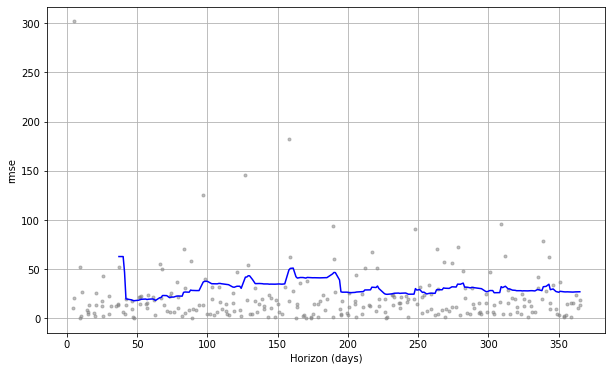

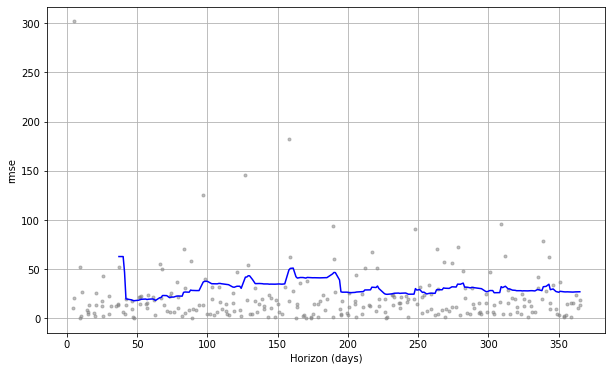

In [20]:
plot_cross_validation_metric(cv,metric='rmse')